# Data Manipulation


In [39]:
import torch
from torch.distributions import multinomial
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

### 2.1 Data Manipulation
1. Run the code in this section. Change the conditional statement X == Y in this section to X < Y or X > Y, and then see what kind of tensor you can get.

In [5]:
X = torch.arange(12, dtype=torch.float32).reshape((3,4))
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
torch.cat((X, Y), dim=0), torch.cat((X, Y), dim=1), X < Y, X > Y

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [ 2.,  1.,  4.,  3.],
         [ 1.,  2.,  3.,  4.],
         [ 4.,  3.,  2.,  1.]]),
 tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
         [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
         [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]]),
 tensor([[ True, False,  True, False],
         [False, False, False, False],
         [False, False, False, False]]),
 tensor([[False, False, False, False],
         [ True,  True,  True,  True],
         [ True,  True,  True,  True]]))

2. Replace the two tensors that operate by element in the broadcasting mechanism with other shapes, e.g., 3-dimensional tensors. Is the result the same as expected?

In [8]:
a = torch.arange(9).reshape((3, 3))
b = torch.arange(1).reshape((1, 1))
a, b, a+b

(tensor([[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]),
 tensor([[0]]),
 tensor([[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]]))

In [10]:
a = torch.arange(12).reshape((3, 4))
b = torch.arange(4).reshape((1, 4))
a, b, a+b

(tensor([[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]),
 tensor([[0, 1, 2, 3]]),
 tensor([[ 0,  2,  4,  6],
         [ 4,  6,  8, 10],
         [ 8, 10, 12, 14]]))

### 2.2 Data Preprocessing
Create a raw dataset with more rows and columns.
1. Delete the column with the most missing values.

In [ ]:
data = pd.read_csv(data_file)

data.isna().sum()

2. Convert the preprocessed dataset to the tensor format.

In [ ]:
X, y = torch.tensor(inputs.values), torch.tensor(outputs.values)
X, y

### 2.3 Linear Algebra
1. Prove that the transpose of a matrix  $\mathbf{A}$ ’s transpose is  $\mathbf{A}$ :  $(\mathbf{A}^\top)^\top=\mathbf{A}$ .


$$[A^\top]_{ij} = A_{ji}$$
$$[B^\top]_{j'i'} = B_{i'j'}$$

$$B = A^\top \implies B_{i'j'} = A_{ji} \implies [B^\top]_{j'i'} = A_{ij} \implies [A^\top]^\top=A$$


2. Given two matrices  $\mathbf{A}$  and  $\mathbf{B}$ , show that the sum of transposes is equal to the transpose of a sum:  $\mathbf{A}^\top + \mathbf{B}^\top = (\mathbf{A} + \mathbf{B})^\top$.

$$[A^\top]_{i'j'} = A_{ji}$$
$$[B^\top]_{i'j'} = B_{ji}$$
$$C_{ij} = [A^\top]_{i'j'} + [B^\top]_{i'j'}$$
$$C_{ij} = A_{ji} + B_{ji}$$

$$A_{ji} + B_{ji} = D_{ji}$$
$$[D^\top]_{i'j'} = D_{ji}$$

$$C_{ij} = [D^\top]_{i'j'}$$


3. Given any square matrix  $\mathbf{A}$ , is  $\mathbf{A}+\mathbf{A}^T$  always symmetric? Why?

Yes, because $[A^\top]_{ij} = A_{ji}$ and a symmetric matrix is one in which for every $i,j$, $a_{ij}=a_{ji}$

4. We defined the tensor X of shape (2, 3, 4) in this section. What is the output of len(X)?

In [3]:
X = torch.arange(24).reshape((2, 3, 4))
len(X)

2

5. For a tensor X of arbitrary shape, does len(X) always correspond to the length of a certain axis of X? What is that axis?

Yes, len(X) awalys return the shape of the first dimension aka zero axis

6. Run A / A.sum(axis=1) and see what happens. Can you analyze the reason?

In [9]:
A = torch.arange(20, dtype=torch.float32).reshape(5, 4)
A/A.sum(axis=1)

RuntimeError: The size of tensor a (4) must match the size of tensor b (5) at non-singleton dimension 1

In [14]:
A.shape, A.sum(axis=1).shape

(torch.Size([5, 4]), torch.Size([5]))

The tensor drops dimensions with size one when we use the sum function. So the programm doesn't know how to behave and throws an error. Broadcasting doesn't work here because it only works when one of the dimension is equal to one.

7. When traveling between two points in Manhattan, what is the distance that you need to cover in terms of the coordinates, i.e., in terms of avenues and streets? Can you travel diagonally?

You can't travel diagonally (unless flying...) so you must walk the number of blocks equivalent to the distance in south direction, plus the distance of blocks in east direction. So to travel for a point $P(x_i, y_i)$ to a point $P(x_j, y_j)$ you must travel in total $|x_i - x_j| + |y_i - y_j|$

8. Consider a tensor with shape (2, 3, 4). What are the shapes of the summation outputs along axis 0, 1, and 2?

In [16]:
X.sum(axis=0).shape, X.sum(axis=1).shape, X.sum(axis=2).shape

(torch.Size([3, 4]), torch.Size([2, 4]), torch.Size([2, 3]))

So it drops the size related to that axis. For axis 0, the 'size' 2 was dropped.

9. Feed a tensor with 3 or more axes to the linalg.norm function and observe its output. What does this function compute for tensors of arbitrary shape?

In [21]:
np.linalg.norm(X)

65.75712889109438

In [26]:
math.sqrt(sum([i**2 for i in range(24)]))

65.75712889109438

### 2.4 Calculus

1. Plot the function  $y = f(x) = x^3 - \frac{1}{x}$  and its tangent line when  $x=1$.

2. Find the gradient of the function $f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$.

$$\frac{\partial f(\mathbf{x})}{\partial x_1} = 6x_1$$

$$\frac{\partial f(\mathbf{x})}{\partial x_2} = 5e^{x_2}$$

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[6x_1, 5e^{x_2}\bigg]^\top$$

3. What is the gradient of the function  $f(\mathbf{x}) = \|\mathbf{x}\|_2$?

$$f(\mathbf{x})= \sqrt{x_1^2 + x_2^2 + \ldots + x_i^2}$$

$$\frac{\partial f(\mathbf{x})}{\partial x_i} = \frac{1}{2\sqrt{x_1^2 + x_2^2 + \ldots + x_i^2}}2x_i$$

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \frac{1}{\sqrt{x_1^2 + x_2^2 + \ldots + x_i^2}}\bigg[ x_1, x_2, \ldots, x_n \bigg]^\top,$$

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \|\mathbf{x}\|_2 \cdot \mathbf{x}$$

4. Can you write out the chain rule for the case where  $u=f(x,y,z)$  and  $x=x(a,b)$ ,  $y=y(a,b)$ , and  $z=z(a,b)$ ?

$$\frac{du}{da} = \frac{du}{dx} \frac{dx}{da} + \frac{du}{dy} \frac{dy}{da} + \frac{du}{dz} \frac{dz}{da}$$

$$\frac{du}{db} = \frac{du}{dx} \frac{dx}{db} + \frac{du}{dy} \frac{dy}{db} + \frac{du}{dz} \frac{dz}{db}$$

### 2.5 Automatic Differentiation

1. Why is the second derivative much more expensive to compute than the first derivative?

2. After running the function for backpropagation, immediately run it again and see what happens.

In [34]:
x = torch.arange(4.0, requires_grad=True)
x.grad

In [31]:
y = 2 * torch.dot(x, x)
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

In [32]:
y.backward()
x.grad

RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling backward the first time.

It throws an error: 

RuntimeError: Trying to backward through the graph a second time, but the saved intermediate results have already been freed. Specify retain_graph=True when calling backward the first time.

3. In the control flow example where we calculate the derivative of d with respect to a, what would happen if we changed the variable a to a random vector or matrix. At this point, the result of the calculation f(a) is no longer a scalar. What happens to the result? How do we analyze this?

In [33]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c
a = torch.arange(4.0, requires_grad=True)
d = f(a)
d.backward()
a.grad

RuntimeError: grad can be implicitly created only for scalar outputs

It throws an error

4. Redesign an example of finding the gradient of the control flow. Run and analyze the result.

5. Let  $f(x)=\sin(x)$ . Plot  $f(x)$  and  $\frac{df(x)}{dx}$ , where the latter is computed without exploiting that  $f′(x)=\cos(x)$ .

### 2.6 Probability

1. We conducted  $m=500$  groups of experiments where each group draws  $n=10$  samples. Vary  $m$  and  $n$ . Observe and analyze the experimental results.

(0.0, 0.3)

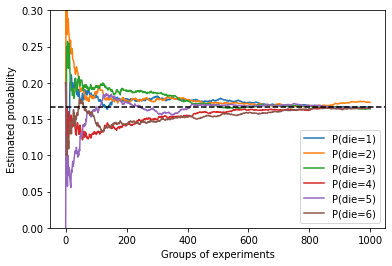

In [77]:
fair_probs = torch.ones([6]) / 6
counts = multinomial.Multinomial(5, fair_probs).sample((1000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

for i in range(6):
    plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend()
plt.ylim(0,0.3)


(0.0, 0.3)

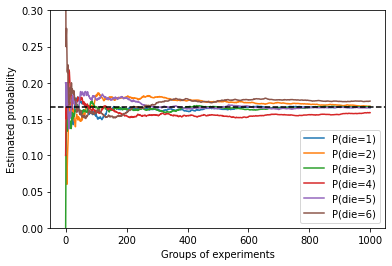

In [78]:
fair_probs = torch.ones([6]) / 6
counts = multinomial.Multinomial(10, fair_probs).sample((1000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

for i in range(6):
    plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend()
plt.ylim(0,0.3)


(0.0, 0.3)

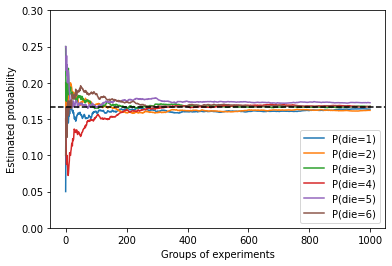

In [79]:
fair_probs = torch.ones([6]) / 6
counts = multinomial.Multinomial(20, fair_probs).sample((1000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

for i in range(6):
    plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend()
plt.ylim(0,0.3)

(0.0, 0.3)

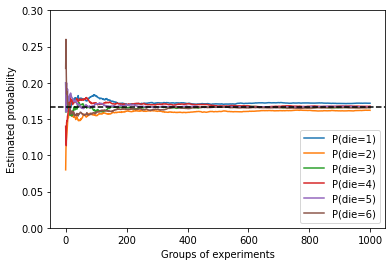

In [80]:
fair_probs = torch.ones([6]) / 6
counts = multinomial.Multinomial(50, fair_probs).sample((1000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

for i in range(6):
    plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
plt.axhline(y=0.167, color='black', linestyle='dashed')
plt.gca().set_xlabel('Groups of experiments')
plt.gca().set_ylabel('Estimated probability')
plt.legend()
plt.ylim(0,0.3)

2. Given two events with probability  $P(\mathcal{A})$  and  $P(\mathcal{B})$ , compute upper and lower bounds on  $P(\mathcal{A}\cup\mathcal{B})$  and  $P(\mathcal{A}\cap\mathcal{B})$ . (Hint: display the situation using a Venn Diagram.)

$P(\mathcal{A}\cup\mathcal{B})$:

**Lower case**: $\mathcal{A}$ and $\mathcal{B}$ have the same set of possible outcomes  $\implies P(\mathcal{A}\cup\mathcal{B}) = P(\mathcal{A}) = P(\mathcal{B})$

**Upper case**: $\mathcal{A}$ and $\mathcal{B}$ are mutually exclusive events $\implies P(\mathcal{A}\cup\mathcal{B}) = P(\mathcal{A}) + P(\mathcal{B})$

$P(\mathcal{A}\cup\mathcal{B})$:

**Lower case**: $\mathcal{A}$ and $\mathcal{B}$ have the same set of possible outcomes $\implies P(\mathcal{A}\cup\mathcal{B}) = 0$

**Upper case**: $\mathcal{A}$ and $\mathcal{B}$ always happen toghether events $\implies P(\mathcal{A}\cup\mathcal{B}) = P(\mathcal{A}) = P(\mathcal{B})$


3. Assume that we have a sequence of random variables, say  $A$ ,  $B$ , and  $C$ , where  $B$  only depends on  $A$ , and  $C$  only depends on  $B$ , can you simplify the joint probability  $P(A,B,C)$ ? (Hint: this is a Markov Chain.)

$$P(A,B,C) = P(A)\times P(B,C) = P(A)\times P(B)\times P(C)$$

4. In Section 2.6.2.6, the first test is more accurate. Why not just run the first test a second time?